# H1N1 FLU VACCINATION PROJECT

## BUSINESS UNDERSTANDING


#### The goal of this project is to leverage the data collected in the National 2009 H1N1 Flu Survey to predict whether individuals received the H1N1 flu vaccine. By understanding the factors influencing personal vaccination patterns, we aim to provide valuable insights that can guide public health efforts. The analysis will focus on uncovering the relationships between individuals' backgrounds, opinions, and health behaviors and their decisions regarding flu vaccination. The project aims to contribute to the ongoing efforts to vaccinate the global population against infectious diseases and viruses, such as the recent viral outbreak of COVID-19, with a particular focus on the experiences from the H1N1 flu outbreak in 2009.


## STAKEHOLDER UNDERSTANDING


#### Assist public health officials seeking insights into vaccination patterns and aid various stakeholders interested in optimizing vaccine distribution strategies.

## DATA SOURCE



#### The data for this project is sourced from the National 2009 H1N1 Flu Survey, consisting of information related to 26, 707 individuals' backgrounds, opinions, and health behaviors during the H1N1 flu outbreak. The dataset encompasses a diverse set of features, including demographic information, socio-economic status, health-related attitudes, and behaviors. The primary focus of the dataset is to understand the factors influencing personal vaccination patterns for the H1N1 flu vaccine.

# DATA UNDERSTANDING

In [1]:
# importing all necessary libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score


%matplotlib inline 

In [2]:
# loading our training dataset
training_features = pd.read_csv('training_set_features.csv')
training_features.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [3]:
# Displaying general information about the dataset
training_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [4]:
#checking for missing values
training_features.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [5]:
# Drop columns with high missing values
threshold = 0.5  # Threshold for dropping columns (50%)
cols_to_drop = training_features.columns[training_features.isnull().mean() > threshold]
training_features_dropped = training_features.drop(columns=cols_to_drop)

dropped_features = list(set(training_features.columns) - set(training_features_dropped.columns))

print(f"The feature that has been dropped is: {dropped_features} for exceeding the missing values threshold")

The feature that has been dropped is: ['employment_occupation'] for exceeding the missing values threshold


### Handling missing values

In [6]:

categorical_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own',
                    'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry']
binary_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
                  'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face',
                  'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition',
                  'child_under_6_months', 'health_worker', 'health_insurance']
numerical_cols = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
                  'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 
                  'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']

# Impute binary missing values with mode
binary_imputer = SimpleImputer(strategy='most_frequent')
training_features_dropped[binary_cols] = binary_imputer.fit_transform(training_features_dropped[binary_cols])

# Impute numerical missing values with median
numerical_imputer = SimpleImputer(strategy='median')
training_features_dropped[numerical_cols] = numerical_imputer.fit_transform(training_features_dropped[numerical_cols])

# Impute categorical missing values with a placeholder (you may want to explore more advanced methods for these)
training_features_dropped[categorical_cols] = training_features_dropped[categorical_cols].fillna('Unknown')


In [7]:
# checking if our missing values have been handled
training_features_dropped.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [8]:
training_features_dropped.select_dtypes("object")

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,Unknown
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",Unknown
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf
...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,Unknown
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr
26704,55 - 64 Years,Some College,White,Female,Unknown,Not Married,Own,Unknown,lzgpxyit,"MSA, Not Principle City",Unknown
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr


In [9]:
# Dataset containing data of if a person was vaccinated or not 1 = yes & 0 = no
vaccination_status = pd.read_csv("training_set_labels.csv")
vaccination_status

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [10]:
# Checking the distribution of our target variable h1n1 vaccine
vaccination_status["h1n1_vaccine"].value_counts(normalize=True)

h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64

In [11]:
# Merge h1n1_vaccine feature to our training_features_dropped dataframe

merged_df = pd.merge(training_features_dropped, vaccination_status[['respondent_id', 'h1n1_vaccine']], on='respondent_id', how='left')
merged_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Unknown,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Unknown,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,Unknown,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Unknown,Not Married,Own,Unknown,lzgpxyit,"MSA, Not Principle City",0.0,0.0,Unknown,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,0


In [12]:
#checking if the new column feature h1n1_vaccine has null values
merged_df["h1n1_vaccine"].isnull().sum()

0

/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

<Figure size 1500x1000 with 0 Axes>

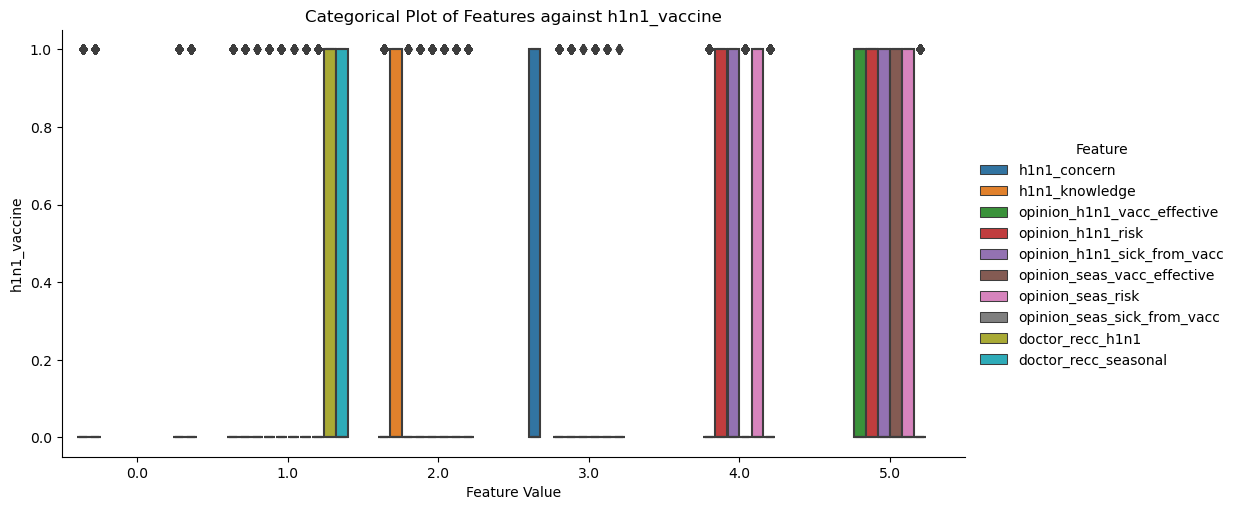

In [13]:
# visualizing relationships
plot_data = merged_df[['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
                  'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 
                  'opinion_seas_sick_from_vacc', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'h1n1_vaccine']]

# Melt the DataFrame to 'long' format for easier plotting
melted_plot_data = plot_data.melt(id_vars='h1n1_vaccine', var_name='Feature', value_name='Value')

# Create a categorical plot using Seaborn
plt.figure(figsize=(15, 10))
sns.catplot(x='Value', y='h1n1_vaccine', hue='Feature', kind='box', data=melted_plot_data, height=5, aspect=2)

# Customize plot (add legend, labels, etc.)
plt.title("Categorical Plot of Features against h1n1_vaccine")
plt.ylabel("h1n1_vaccine")
plt.xlabel("Feature Value")
plt.show()

/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


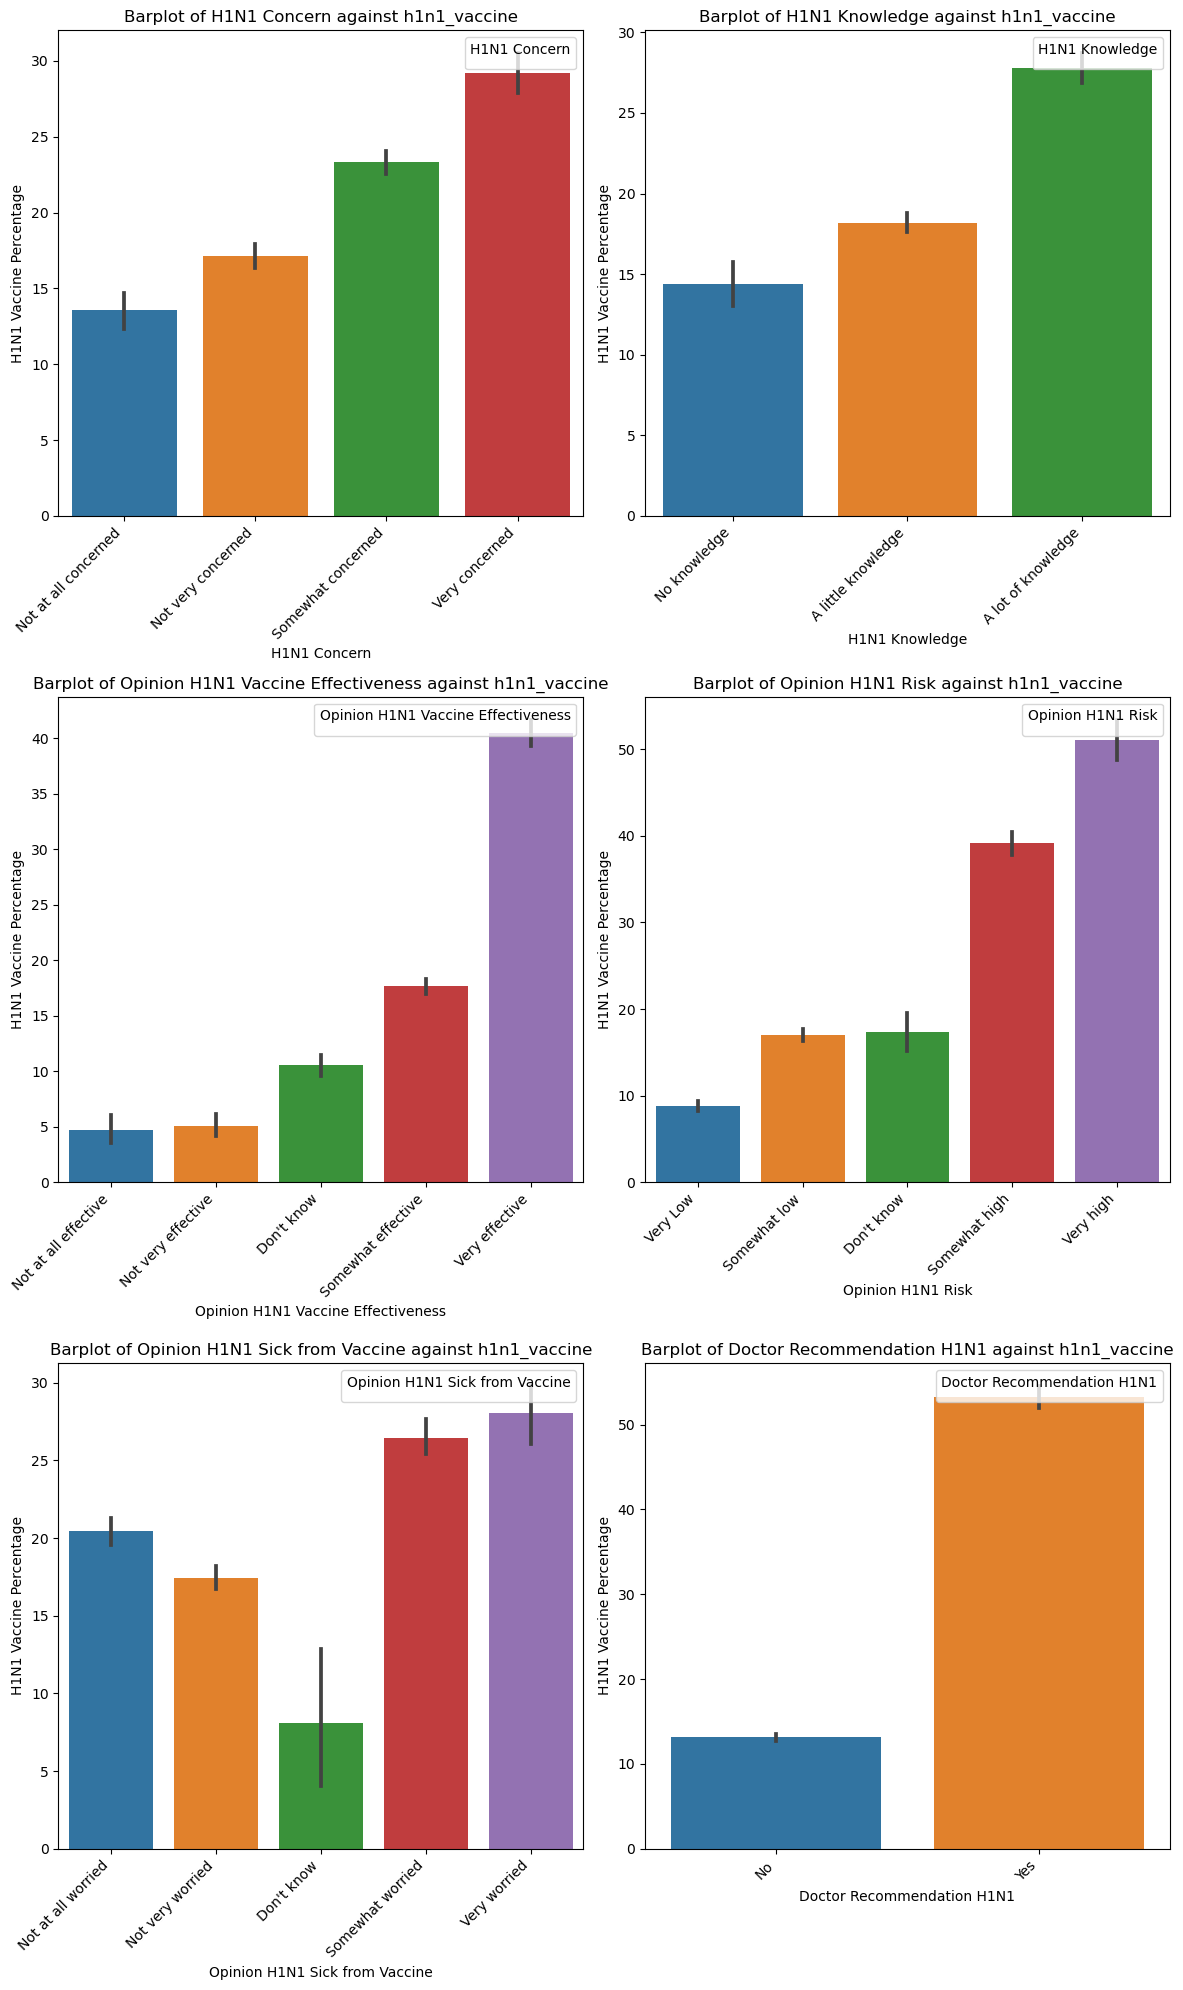

In [28]:
# visualizing relationships
plot_data = merged_df[['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
                  'opinion_h1n1_sick_from_vacc', 'doctor_recc_h1n1', 'h1n1_vaccine']]

# Set up subplots for each feature
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 20))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Define custom labels for each barplot
custom_labels = {
    'h1n1_concern': {0: 'Not at all concerned', 1: 'Not very concerned', 2: 'Somewhat concerned', 3: 'Very concerned'},
    'h1n1_knowledge': {0: 'No knowledge', 1: 'A little knowledge', 2: 'A lot of knowledge'},
    'opinion_h1n1_vacc_effective': {1: 'Not at all effective', 2: 'Not very effective', 3: 'Don\'t know', 4: 'Somewhat effective', 5: 'Very effective'},
    'opinion_h1n1_risk': {1: 'Very Low', 2: 'Somewhat low', 3: 'Don\'t know', 4: 'Somewhat high', 5: 'Very high'},
    'opinion_h1n1_sick_from_vacc': {1: 'Not at all worried', 2: 'Not very worried', 3: 'Don\'t know', 4: 'Somewhat worried', 5: 'Very worried'},
    'doctor_recc_h1n1': {0: 'No', 1: 'Yes'},
}

# X axis label name change
x_custom_labels = {
    'h1n1_concern': 'H1N1 Concern',
    'h1n1_knowledge': 'H1N1 Knowledge',
    'opinion_h1n1_vacc_effective': 'Opinion H1N1 Vaccine Effectiveness',
    'opinion_h1n1_risk': 'Opinion H1N1 Risk',
    'opinion_h1n1_sick_from_vacc': 'Opinion H1N1 Sick from Vaccine',
    'doctor_recc_h1n1': 'Doctor Recommendation H1N1'
}

# Loop through each feature and create barplot
for i, feature in enumerate(plot_data.columns[:-1]):  # Exclude 'h1n1_vaccine'
    sns.barplot(x=feature, y=plot_data['h1n1_vaccine']*100, data=plot_data, ax=axes[i])
    
    # Set custom labels for x and y axes
    axes[i].set_xlabel(x_custom_labels.get(feature, feature))
    axes[i].set_ylabel('H1N1 Vaccine Percentage')
    
     # Set x-axis tick labels based on the custom_labels dictionary
    if feature in custom_labels:
        axes[i].set_xticklabels([custom_labels[feature].get(label, label) for label in sorted(plot_data[feature].unique())], rotation=45, ha='right')
    
    # Set legend
    axes[i].legend(title=(x_custom_labels.get(feature, feature)), loc='upper right')
    axes[i].set_title(f'Barplot of {x_custom_labels.get(feature, feature)} against h1n1_vaccine')    

# Adjust layout
plt.tight_layout()
plt.show()